In [1]:
# 1. 랭스미스 초기화

import os
from dotenv import load_dotenv
from langchain.callbacks.manager import tracing_v2_enabled

load_dotenv()



# 트레이싱 상태 확인
with tracing_v2_enabled() as tracing:
    print(f"Tracing enabled: {tracing}")


Tracing enabled: <langchain_core.tracers.langchain.LangChainTracer object at 0x10423e150>


In [ ]:

# 2. 체인 초기화 및 실행
from llm_compiler_hyper_join import initialize_chain
from langchain_core.messages import HumanMessage, SystemMessage
from pprint import pprint

chain = initialize_chain()

# 3. 스트리밍 실행
for step in chain.stream(
    {
    "messages": [HumanMessage(content= "BGF리테일과 GS리테일 중 누가 매출이 더 높았나요?")],
    "key_information": []
    }
):
    print("step 디버깅 : ", step)

print("---------------------최종 답변 --------------------------")
pprint(step["join"]["messages"][-1].content)
print("\n---------------------참고 문헌 --------------------------")
if "key_information" in step["join"]:
    key_info = step["join"]["key_information"]
    if key_info:
        for info in key_info:
            print(f"\n📚 도구: {info.get('tool', 'N/A')}")
            print(f"📄 참고 내용: {info.get('referenced_content', 'N/A')}")
            if info.get('filename'):
                print(f"📎 파일명: {info.get('filename')}")
            if info.get('page_number'):
                print(f"📑 페이지: {info.get('page_number')}")
            if info.get('link'):
                print(f"🔗 링크: {info.get('link')}")
            if info.get('title'):
                print(f"📑 제목: {info.get('title')}")
            if info.get('broker'):
                print(f"🏢 증권사: {info.get('broker')}")
            if info.get('target_price'):
                print(f"💰 목표가: {info.get('target_price')}")
            if info.get('investment_opinion'):
                print(f"💡 투자의견: {info.get('investment_opinion')}")
            print("-" * 50)
    else:
        print("참고 문헌이 없습니다.")
print("------------------------------------------------------")

In [2]:
test1=["BGF리테일과 GS리테일 중 누가 매출이 더 높았나요?",
"GS리테일의 2023년 당기순이익은?",
"HL만도의 총 자산은 얼마로 보고되었나요?",
"한익스프레스의 자본구조에 대해 설명해봐",
"삼성전자의 2021년부터 2023년까지 영업이익 평균을 계산해줘",
"SK하이닉스의 부채가 자본보다 큽니까?",
"현대차의 주식 최근 5년 추이를 알려줘",
"삼성전자 2023년 ROE를 구해줘",
"한화의 총자산과 부채비율의 변동 패턴은 무엇인가요?",
"기업은행의 2023년까지의 영업이익 추세를 알려줘"]

캐시된 순매수 가중치 사용
기존 벡터스토어를 로드합니다...
기존 기업 벡터스토어를 로드합니다...
Plan*Scheduler 시작할 때의 replan Count를 체크하겠습니다. 404
original_query: BGF리테일과 GS리테일 중 누가 매출이 더 높았나요?

=== 기업명 추출 시작 ===
입력 쿼리: BGF리테일과 GS리테일 중 누가 매출이 더 높았나요?

[Step 1: LLM으로 회사명 텍스트 추출 중...]
LLM 응답: content='["BGF리테일", "GS리테일"]' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 624, 'total_tokens': 640, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0125-preview', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-a2b860b8-08b8-4164-8442-e2837059e43d-0' usage_metadata={'input_tokens': 624, 'output_tokens': 16, 'total_tokens': 640, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
- LLM이 예상한 회사명 목록: ['BGF리테일', 'GS

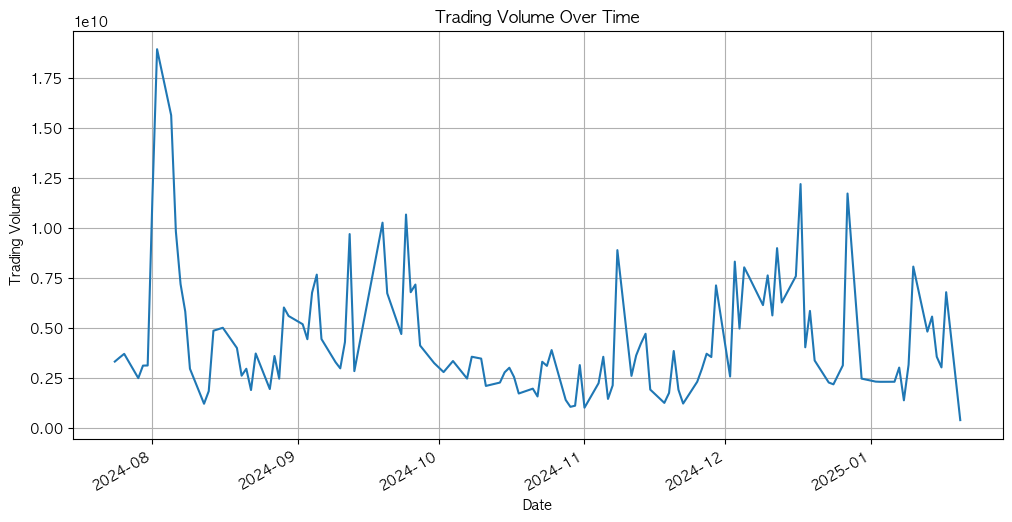


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport pandas as pd\n\ndf['거래대금'] = df['거래대금'].astype(float)\ndf.index = pd.to_datetime(df.index)\n\n# Plotting 거래대금 over time\ndf['거래대금'].plot(figsize=(12, 6), title='Trading Volume Over Time')\nplt.xlabel('Date')\nplt.ylabel('Trading Volume')\nplt.grid(True)\nplt.show()"}`
responded: 주어진 데이터프레임을 통해 매출을 직접적으로 계산할 수는 없습니다. 그러나 거래대금과 관련된 정보를 통해 간접적으로 매출과 관련된 인사이트를 얻을 수 있습니다. 거래대금은 주식이 거래된 총 금액을 나타내며, 이는 주가와 거래량에 의해 결정됩니다.

매출과 관련된 분석을 위해 다음과 같은 절차를 따를 수 있습니다:

1. **거래대금의 추세 분석**: 거래대금의 변화를 통해 시장의 관심도나 거래 활발성을 파악할 수 있습니다.
2. **주가와 거래량의 상관관계 분석**: 주가와 거래량의 변화를 통해 매출과 관련된 간접적인 인사이트를 얻을 수 있습니다.

이러한 분석을 통해 매출과 관련된 간접적인 정보를 얻을 수 있습니다. 분석을 진행해보겠습니다.



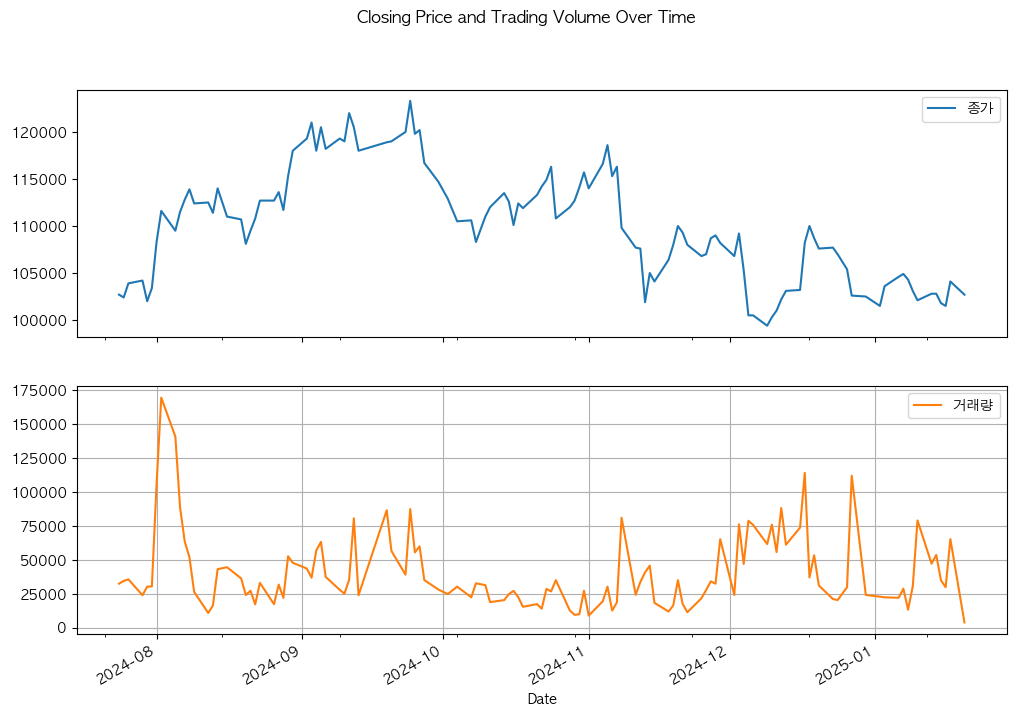


Invoking: `python_repl_ast` with `{'query': "# Plotting 종가 and 거래량 over time\ndf[['종가', '거래량']].plot(subplots=True, figsize=(12, 8), title='Closing Price and Trading Volume Over Time')\nplt.xlabel('Date')\nplt.grid(True)\nplt.show()"}`
responded: 위의 그래프는 2024년 7월 24일부터 2025년 1월 20일까지의 거래대금 변화를 시각화한 것입니다. 이를 통해 특정 기간 동안 거래가 활발했던 시점이나 거래대금이 급격히 변동한 시점을 파악할 수 있습니다. 이러한 정보는 매출과 관련된 간접적인 인사이트를 제공할 수 있습니다.

추가적으로, 주가와 거래량의 상관관계를 분석하여 매출과 관련된 더 많은 정보를 얻을 수 있습니다. 이를 위해 주가와 거래량의 변화를 함께 살펴보겠습니다.

위의 그래프는 2024년 7월 24일부터 2025년 1월 20일까지의 종가와 거래량 변화를 시각화한 것입니다. 이를 통해 주가와 거래량의 변화를 비교할 수 있으며, 특정 시점에서의 주가 변동과 거래량의 관계를 파악할 수 있습니다.

이러한 분석을 통해 다음과 같은 인사이트를 얻을 수 있습니다:
- 거래대금이 급격히 증가한 시점은 시장의 관심이 높아진 시점으로, 매출과 관련된 중요한 이벤트가 있었을 가능성이 있습니다.
- 주가와 거래량의 동반 상승은 긍정적인 시장 반응을 나타낼 수 있으며, 이는 매출 증가와 관련될 수 있습니다.

이러한 분석 결과를 바탕으로 매출과 관련된 간접적인 인사이트를 도출할 수 있습니다. 추가적인 질문이나 분석이 필요하시면 말씀해 주세요.

> Finished chain.
tool_to_use 를 확인해보겠습니다. 
market_data_tool
tool_to_use 가 문자열인 경우
market_data_tool
tool_mapping 를 확인해보겠습니다. 
{'web_

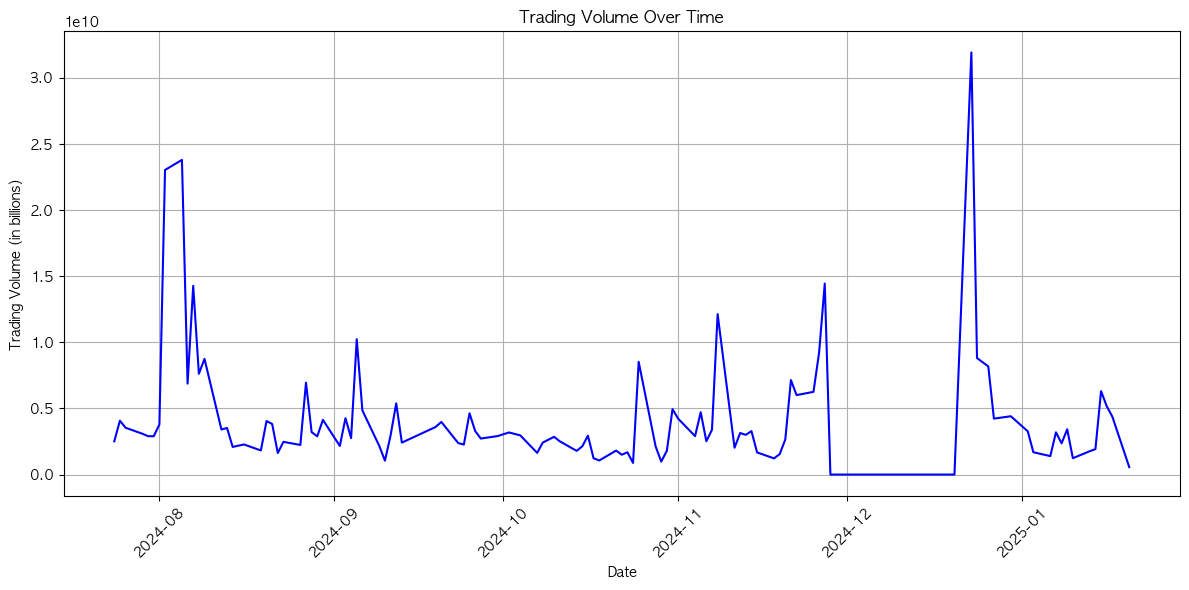


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Assuming df is already defined and contains the data\n# Convert index to datetime if not already\nif not pd.api.types.is_datetime64_any_dtype(df.index):\n    df.index = pd.to_datetime(df.index)\n\n# Plotting 거래대금 over time\nplt.figure(figsize=(12, 6))\nplt.plot(df.index, df['거래대금'], label='Trading Volume', color='blue')\nplt.title('Trading Volume Over Time')\nplt.xlabel('Date')\nplt.ylabel('Trading Volume (in billions)')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.tight_layout()\nplt.show()"}`
responded: 주어진 데이터프레임의 기간은 2024년 7월 24일부터 2025년 1월 20일까지입니다. 이 기간 동안의 주가 데이터를 분석하여 매출과 관련된 인사이트를 도출할 수 있습니다. 

매출과 관련된 분석을 위해서는 거래대금과 거래량을 활용할 수 있습니다. 거래대금은 주식이 거래된 총 금액을 나타내며, 이는 매출과 직접적으로 관련이 있습니다. 

분석 절차는 다음과 같습니다:

1. **거래대금의 추세 분석**: 기간 동안의 거래대금 변화를 살펴봅니다.
2. **주요 이벤트 식별**: 거래대금이 급격히 증가하거나 감소한 날을 식별합니다.
3. **결론 도출**: 거래대금의 변동이 기업의 매출에 어떤 영향을 미쳤는지에 대한 인사이트를 도출합니다.

이제 거래대금의 추세를 분석해보겠습니다.

ERROR:plan.scheduler_hcx:Task execution failed: 2 validation errors for math
context.1
  Input should be a valid string [type=string_type, input_value=[], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
context.2
  Input should be a valid string [type=string_type, input_value=[], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
Traceback (most recent call last):
  File "/Users/joajoa/Desktop/Naver/DONI/plan/scheduler_hcx.py", line 110, in _execute_task
    result = tool_to_use.invoke(resolved_args, config)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/joajoa/Desktop/Naver/langchain_demo_코드정리/new_joavenv/lib/python3.11/site-packages/langchain_core/tools/base.py", line 484, in invoke
    return self.run(tool_input, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/joajoa/Desktop/Naver/langchain_demo_코드정리/new_joavenv/lib/python3.11/site-pack

tool_to_use 를 확인해보겠습니다. 
math
tool_to_use 가 문자열인 경우
math
tool_mapping 를 확인해보겠습니다. 
{'web_search': <function _execute_task.<locals>.<lambda> at 0x2a8e0f2e0>, 'math': <function _execute_task.<locals>.<lambda> at 0x2a8e0f380>, 'report_rag_search': <class 'tools.retrieve.analystReport.report_RAG_Tool.ReportRAGTool'>, 'StockAnalyzerTool': <class 'tools.analyze.stockprice.StockAnalyzerTool.StockAnalyzerTool'>, 'CombinedAnalysisTool': <class 'tools.analyze.stockprice.CombinedAnalysisTool.CombinedAnalysisTool'>, 'SameSectorAnalyzer': <class 'tools.analyze.stockprice.SameSectorCompareTool.SameSectorAnalyzerTool'>, 'combined_financial_report_search': <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'>, 'market_data_tool': <class 'tools.marketData.market_agent.MarketDataTool'>}
(resolved 전)*args check *************
{'problem': 'average of ($1, $2, $3)', 'context': ['$1', '$2', '$3']}
******************************
*Whatis my arg ? *************
['$1', 


=== _parse_response input logging : {'status': {'code': '20000', 'message': 'OK'}, 'result': {'message': {'role': 'user', 'content': 'Tasks:\n- 1. combined_financial_report_search(query: "2023, 2022, 2021년 영업이익", company: "삼성전자", year: 2023)\n  - Dependencies: []\n- 2. math(problem: "average of $1, $2, $3", context: ["$1", "$2", "$3"])\n  - Dependencies: [1]'}, 'inputLength': 3081, 'outputLength': 86, 'stopReason': 'stop_before', 'seed': 1277143628, 'aiFilter': [{'groupName': 'curse', 'name': 'insult', 'score': '2', 'result': 'OK'}, {'groupName': 'curse', 'name': 'discrimination', 'score': '2', 'result': 'OK'}, {'groupName': 'unsafeContents', 'name': 'sexualHarassment', 'score': '2', 'result': 'OK'}]}}
=== Content String 디버깅 ===
Tasks:
- 1. combined_financial_report_search(query: "2023, 2022, 2021년 영업이익", company: "삼성전자", year: 2023)
  - Dependencies: []
- 2. math(problem: "average of $1, $2, $3", context: ["$1", "$2", "$3"])
  - Dependencies: [1]
Parsed tasks: []
structured_llm_call 


=== _parse_response input logging : {'status': {'code': '20000', 'message': 'OK'}, 'result': {'message': {'role': 'user', 'content': 'Tasks:\n- 1. combined_financial_report_search(query: "2023, 2022, 2021년 영업이익", company: "삼성전자", year: 2023)\n- 2. math(problem: "average of $1, $2, $3", context: ["$1", "$2", "$3"])'}, 'inputLength': 3151, 'outputLength': 70, 'stopReason': 'stop_before', 'seed': 4133671843, 'aiFilter': [{'groupName': 'curse', 'name': 'insult', 'score': '2', 'result': 'OK'}, {'groupName': 'curse', 'name': 'discrimination', 'score': '2', 'result': 'OK'}, {'groupName': 'unsafeContents', 'name': 'sexualHarassment', 'score': '2', 'result': 'OK'}]}}
=== Content String 디버깅 ===
Tasks:
- 1. combined_financial_report_search(query: "2023, 2022, 2021년 영업이익", company: "삼성전자", year: 2023)
- 2. math(problem: "average of $1, $2, $3", context: ["$1", "$2", "$3"])
Parsed tasks: []
structured_llm_call result: PlanResult(thought='작업 계획 수립 완료', tasks=[])

=== HyperCLOVA 생성 계획 디버깅 ===
생각 과정:

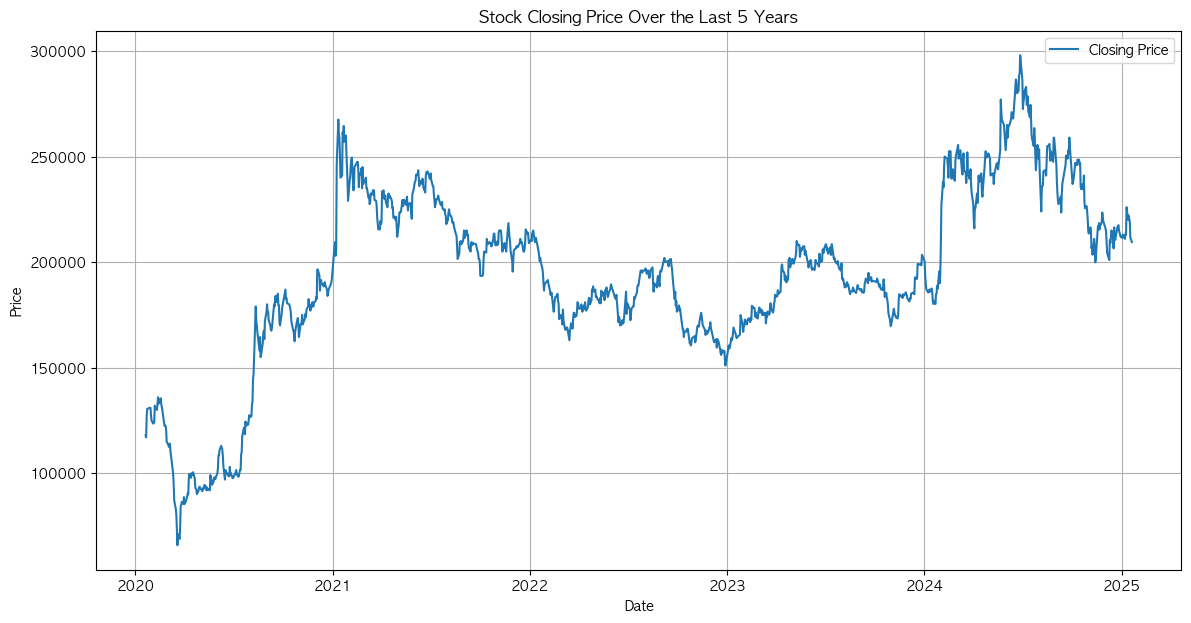


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Assuming df is already defined and contains the data\n# Convert the index to datetime if it's not already\nif not pd.api.types.is_datetime64_any_dtype(df.index):\n    df.index = pd.to_datetime(df.index)\n\n# Plot the closing price over time\nplt.figure(figsize=(14, 7))\nplt.plot(df.index, df['종가'], label='Closing Price')\nplt.title('Stock Closing Price Over the Last 5 Years')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.legend()\nplt.grid(True)\nplt.show()"}`


위 그래프는 지난 5년간의 주가 추이를 보여줍니다. 그래프를 통해 주가의 상승과 하락 추세를 시각적으로 확인할 수 있습니다. 

- 2020년 초반에는 주가가 하락세를 보였으나, 이후 회복하여 상승세로 전환되었습니다.
- 2020년 중반부터 2021년까지는 주가가 꾸준히 상승하는 모습을 보였습니다.
- 2022년과 2023년에는 주가가 변동을 겪으며, 특정 시점에서 급격한 상승과 하락이 있었습니다.
- 2024년부터 2025년 초까지는 주가가 안정적인 모습을 보이며, 큰 변동 없이 유지되었습니다.

이러한 추세를 통해 기업의 주가가 외부 요인에 의해 영향을 받았을 가능성을 고려할 수 있습니다.

> Finished chain.
observations
replan_count 초기화 0
step 디버깅 :  {'plan_and_schedule': {'messag

ERROR:plan.scheduler_hcx:Task execution failed: 1 validation error for math
context.1
  Input should be a valid string [type=string_type, input_value=[], input_type=list]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
Traceback (most recent call last):
  File "/Users/joajoa/Desktop/Naver/DONI/plan/scheduler_hcx.py", line 110, in _execute_task
    result = tool_to_use.invoke(resolved_args, config)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/joajoa/Desktop/Naver/langchain_demo_코드정리/new_joavenv/lib/python3.11/site-packages/langchain_core/tools/base.py", line 484, in invoke
    return self.run(tool_input, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/joajoa/Desktop/Naver/langchain_demo_코드정리/new_joavenv/lib/python3.11/site-packages/langchain_core/tools/base.py", line 725, in run
    raise error_to_raise
  File "/Users/joajoa/Desktop/Naver/langchain_demo_코드정리/new_joavenv/lib/python3.11/site-packag

tool_to_use 를 확인해보겠습니다. 
math
tool_to_use 가 문자열인 경우
math
tool_mapping 를 확인해보겠습니다. 
{'web_search': <function _execute_task.<locals>.<lambda> at 0x29e7191c0>, 'math': <function _execute_task.<locals>.<lambda> at 0x29e719260>, 'report_rag_search': <class 'tools.retrieve.analystReport.report_RAG_Tool.ReportRAGTool'>, 'StockAnalyzerTool': <class 'tools.analyze.stockprice.StockAnalyzerTool.StockAnalyzerTool'>, 'CombinedAnalysisTool': <class 'tools.analyze.stockprice.CombinedAnalysisTool.CombinedAnalysisTool'>, 'SameSectorAnalyzer': <class 'tools.analyze.stockprice.SameSectorCompareTool.SameSectorAnalyzerTool'>, 'combined_financial_report_search': <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'>, 'market_data_tool': <class 'tools.marketData.market_agent.MarketDataTool'>}
(resolved 전)*args check *************
{'problem': '(($0) / ($1)) * 100', 'context': ['$0', '$1']}
******************************
*Whatis my arg ? *************
['$0', '$1']
*Obs

In [3]:

# 2. 체인 초기화 및 실행
from llm_compiler_hyper_join import initialize_chain
from langchain_core.messages import HumanMessage, SystemMessage
from pprint import pprint

chain = initialize_chain()
for quest in test1:
    # 3. 스트리밍 실행
    for step in chain.stream(
        {
        "messages": [HumanMessage(content= quest)],
        "key_information": []
        }
    ):
        print("step 디버깅 : ", step)

    print("---------------------최종 답변 --------------------------")
    pprint(step["join"]["messages"][-1].content)
    print("\n---------------------참고 문헌 --------------------------")
    if "key_information" in step["join"]:
        key_info = step["join"]["key_information"]
        if key_info:
            for info in key_info:
                print(f"\n📚 도구: {info.get('tool', 'N/A')}")
                print(f"📄 참고 내용: {info.get('referenced_content', 'N/A')}")
                if info.get('filename'):
                    print(f"📎 파일명: {info.get('filename')}")
                if info.get('page_number'):
                    print(f"📑 페이지: {info.get('page_number')}")
                if info.get('link'):
                    print(f"🔗 링크: {info.get('link')}")
                if info.get('title'):
                    print(f"📑 제목: {info.get('title')}")
                if info.get('broker'):
                    print(f"🏢 증권사: {info.get('broker')}")
                if info.get('target_price'):
                    print(f"💰 목표가: {info.get('target_price')}")
                if info.get('investment_opinion'):
                    print(f"💡 투자의견: {info.get('investment_opinion')}")
                print("-" * 50)
        else:
            print("참고 문헌이 없습니다.")
    print("------------------------------------------------------")

# 4. 스프레드시트 연결

In [6]:
import gspread
import time

# 서비스 계정 인증 및 스프레드시트 연결
gc = gspread.service_account(filename='data/studycount.json')
doc = gc.open_by_url("https://docs.google.com/spreadsheets/d/17Tk4zjNPDld3nhnWWxLFJImJozI_V_Zs3Q6vxntG8Ec/edit?gid=1115029927#gid=1115029927")
#worksheet1 = doc.worksheet("하하하하하하하하LEVEL2하하ㅏ")
worksheet2 = doc.worksheet("최종발표_질문_L2_v4")

# 원하는 worksheet 선택
cur_ws = worksheet2

# 'LLM Compiler v1'열 번호 (H열 = 8번째 열)
compiler_v1_col = 6

# 1. 데이터 읽기
questions_col = cur_ws.col_values(2)  # B열(질문) 전체 값
compiler_col = cur_ws.col_values(compiler_v1_col)  # H열(LLM Compiler v1) 전체 값

# 2. 비어 있는 셀의 행 인덱스만 선택
rows_to_process = []
questions_to_process = []

for i in range(len(questions_col)):
    # 질문(B열)은 채워져 있고, LLM Compiler v1(H열)은 비어 있는 경우만 추가
    if questions_col[i] and (len(compiler_col) <= i or not compiler_col[i]):  
        rows_to_process.append(i + 1)  # 행 번호 저장 (1부터 시작)
        questions_to_process.append(questions_col[i])  # 질문 저장

# 3. 처리할 함수 정의
def process_question(question):
    chain=initialize_chain()
    for step in chain.stream(
    {"messages": [HumanMessage(content= question)]}
    ):
        print(step)
        print("\n---------------------참고 문헌 --------------------------")
    if "key_information" in step["join"]:
        key_info = step["join"]["key_information"]
        if key_info:
            for info in key_info:
                print(f"\n📚 도구: {info.get('tool', 'N/A')}")
                print(f"📄 참고 내용: {info.get('referenced_content', 'N/A')}")
                if info.get('filename'):
                    print(f"📎 파일명: {info.get('filename')}")
                if info.get('page_number'):
                    print(f"📑 페이지: {info.get('page_number')}")
                if info.get('link'):
                    print(f"🔗 링크: {info.get('link')}")
                if info.get('title'):
                    print(f"📑 제목: {info.get('title')}")
                if info.get('broker'):
                    print(f"🏢 증권사: {info.get('broker')}")
                if info.get('target_price'):
                    print(f"💰 목표가: {info.get('target_price')}")
                if info.get('investment_opinion'):
                    print(f"💡 투자의견: {info.get('investment_opinion')}")
                print("-" * 50)
        else:
            print("참고 문헌이 없습니다.")
    return step["join"]["messages"][-1].content

# print(rows_to_process)

# 4. 각 질문을 처리하여 결과를 'LLM Compiler v1'열에 추가
for idx, row in enumerate(rows_to_process):
    question = questions_to_process[idx]
    # 함수 호출로 결과 생성
    result = process_question(question)

    # 결과를 'LLM Compiler v1'열에 추가 
    cur_ws.update_cell(row, compiler_v1_col, result)  # 해당 행(H열) 업데이트
    print("-----------------------------------------------------------------------")
    print(f"{row}번째 질문 완료: {result}")
    print("-----------------------------------------------------------------------")
    print()
    time.sleep(1)  # 속도 조절을 위해 1초 대기








=== 기업명 추출 시작 ===
입력 쿼리: 삼성전자의 2022년, 2023년 유형자산 취득 금액 증감 비율 분석해줘

[Step 1: LLM으로 회사명 텍스트 추출 중...]
LLM 응답: content='["삼성전자"]' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 640, 'total_tokens': 648, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0125-preview', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-e74d7b3b-8461-4043-9665-96fe240472b3-0' usage_metadata={'input_tokens': 640, 'output_tokens': 8, 'total_tokens': 648, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}
- LLM이 예상한 회사명 목록: ['삼성전자']

[Step 2: 삼성전자에 대한 유사 기업명 후보 추출 중...]
[('삼성전자', 1.0), ('삼성전자판매', 0.7666666666666667), ('인성전자', 0.75), ('삼지전자', 0.75), ('한성전자', 0.75), ('현성전자', 0.75), ('영성전자', 0

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to 

(resolved 전)*args check *************
{'query': '2021, 2022, 2023년 유형자산 취득금액', 'company': '삼성전자', 'year': 2023}

Resolving dict args: {'query': '2021, 2022, 2023년 유형자산 취득금액', 'company': '삼성전자', 'year': 2023}
******************************
*Whatis my arg ? *************
2021, 2022, 2023년 유형자산 취득금액
*Observations check *************
{}
******************************
*Whatis my arg ? *************
삼성전자
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2021, 2022, 2023년 유형자산 취득금액', 'company': '삼성전자', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2021, 2022, 2023년 유형자산 취득금액', 'company': '삼성전자', 'year': 2023}
입력 회사명 : 삼성전자, 입력 연도 : 2023
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
사업 보고서 번호:  20240312000736
             접수번호    연도  재무제표명       계정명  

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'problem': '($2 - $1) / $1 * 100', 'context': ['$1.2021', '$1.2022']}

Resolving dict args: {'problem': '($2 - $1) / $1 * 100', 'context': ['$1.2021', '$1.2022']}
******************************
*Whatis my arg ? *************
['$1.2021', '$1.2022']
*Observations check *************
{1: {'output': '삼성전자의 유형 자산 취득 금액은 다음과 같습니다 : - 2023년 : 57611490000000 KRW - 2022년 : 49430430000000 KRW - 2021년 : 47122210010000 KRW 이 금액 들은 현금 흐름 표에서 유형 자산의 취득으로 기록된 금액 입니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 확인할 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '유형자산의 취득금액은 다음과 같습니다:\n\n- 2023년 (제 55 기): 57,611,290,000,000 KRW\n- 2022년 (제 54 기): 49,430,430,000,000 KRW\n- 2021년 (제 53 기): 47,122,110,000,000 KRW\n\n이 금액들은 현금흐름표에서 유형자산의 취득으로 기록된 금액입니다. 추가적인 정보가 필요하시면 사업보고서에서 더 많은 세부사항을 확인할 수 있습니다.', 'page_number': '연결 재무제표', 'filename': '삼성전자_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240312000736&dcmNo=9702

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
((57611490000000 - 49430430000000) / 49430430000000) * 100
(resolved 전)*args check *************
{'problem': '($3 - $2) / $2 * 100', 'context': ['$1.2022', '$1.2023']}

Resolving dict args: {'problem': '($3 - $2) / $2 * 100', 'context': ['$1.2022', '$1.2023']}
******************************
*Whatis my arg ? *************
['$1.2022', '$1.2023']
*Observations check *************
{1: {'output': '삼성전자의 유형 자산 취득 금액은 다음과 같습니다 : - 2023년 : 57611490000000 KRW - 2022년 : 49430430000000 KRW - 2021년 : 47122210010000 KRW 이 금액 들은 현금 흐름 표에서 유형 자산의 취득으로 기록된 금액 입니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 확인할 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '유형자산의 취득금액은 다음과 같습니다:\n\n- 2023년 (제 55 기): 57,611,290,000,000 KRW\n- 2022년 (제 54 기): 49,430,430,000,000 KRW\n- 2021년 (제 53 기): 47,122,110,000,000 KRW\n\n이 금액들은 현금흐름표에서 유형자산의 취득으로 기록된 금액입니다. 추가적인 정보가 필요하시면 사업보고서에서 더 많은 세부사항을 확인할 수 있습니다.', 'page_number': '연결 재무제표', 'fi

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable 

******************************
*code_model.code *************
((57611490000000 - 49430430000000) / 49430430000000) * 100
observations
{'plan_and_schedule': {'messages': [FunctionMessage(content="{'output': '삼성전자의 유형 자산 취득 금액은 다음과 같습니다 : - 2023년 : 57611490000000 KRW - 2022년 : 49430430000000 KRW - 2021년 : 47122210010000 KRW 이 금액 들은 현금 흐름 표에서 유형 자산의 취득으로 기록된 금액 입니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 확인할 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '유형자산의 취득금액은 다음과 같습니다:\\n\\n- 2023년 (제 55 기): 57,611,290,000,000 KRW\\n- 2022년 (제 54 기): 49,430,430,000,000 KRW\\n- 2021년 (제 53 기): 47,122,110,000,000 KRW\\n\\n이 금액들은 현금흐름표에서 유형자산의 취득으로 기록된 금액입니다. 추가적인 정보가 필요하시면 사업보고서에서 더 많은 세부사항을 확인할 수 있습니다.', 'page_number': '연결 재무제표', 'filename': '삼성전자_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240312000736&dcmNo=9702846&eleId=19&offset=317634&length=113179&dtd=dart4.xsd'}]}", additional_kwargs={'idx': 1, 'args': {'query': '2021, 2022, 202

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable 

(resolved 전)*args check *************
{'query': '2022, 2023년 데이터를 매출원가, 재고자산 찾아주세요', 'company': '삼성전자', 'year': 2023}

Resolving dict args: {'query': '2022, 2023년 데이터를 매출원가, 재고자산 찾아주세요', 'company': '삼성전자', 'year': 2023}
******************************
*Whatis my arg ? *************
2022, 2023년 데이터를 매출원가, 재고자산 찾아주세요
*Observations check *************
{}
******************************
*Whatis my arg ? *************
삼성전자
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 데이터를 매출원가, 재고자산 찾아주세요', 'company': '삼성전자', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 데이터를 매출원가, 재고자산 찾아주세요', 'company': '삼성전자', 'year': 2023}
입력 회사명 : 삼성전자, 입력 연도 : 2023
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
사업 보고서 번호:  20240312000736
            

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'problem': '($1_2022년 매출원가 / $1_2022년 재고자산)', 'context': ['$1']}

Resolving dict args: {'problem': '($1_2022년 매출원가 / $1_2022년 재고자산)', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': '삼성전자의 최근 3개 연도에 대한 매출원가와 재고 자산 현황은 다음과 같습니다 : ### 매출원가 - ** 2023년 ( 제 55 기 ) **: 180388600000000 KRW - ** 2022년 ( 제 54 기 ) **: 190041900000000 KRW - ** 2021년 ( 제 53 기 ) **: 166411500000000 KRW ### 재고 자산 - ** 2023년 ( 제 55 기 ) **: 51625870000000 KRW - ** 2022년 ( 제 54 기 ) **: 52187970000000 KRW - ** 2021년 ( 제 53 기 ) **: 41384400000000 KRW 이 데이터는 KRW ( 한국 원화 ) 단위로 표시되어 있습니다 . 매출원가는 2022년에서 2023년으로 감소하였으며 재고 자산은 2022년에서 2023년으로 약간 감소하였습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 가져올 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '다음은 최근 3개 연도에 대한 매출원가와 재고자산의 현황입니다:\n\n### 매출원가\n- **2023년 (제 55 기)**: 180,388,600,000,000 KRW\n- **2022년 (제 54 기)**: 190,041,800,000,

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
190041900000000 / 52187970000000
(resolved 전)*args check *************
{'problem': '($1_2023년 매출원가 / $1_2023년 재고자산)', 'context': ['$1']}

Resolving dict args: {'problem': '($1_2023년 매출원가 / $1_2023년 재고자산)', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': '삼성전자의 최근 3개 연도에 대한 매출원가와 재고 자산 현황은 다음과 같습니다 : ### 매출원가 - ** 2023년 ( 제 55 기 ) **: 180388600000000 KRW - ** 2022년 ( 제 54 기 ) **: 190041900000000 KRW - ** 2021년 ( 제 53 기 ) **: 166411500000000 KRW ### 재고 자산 - ** 2023년 ( 제 55 기 ) **: 51625870000000 KRW - ** 2022년 ( 제 54 기 ) **: 52187970000000 KRW - ** 2021년 ( 제 53 기 ) **: 41384400000000 KRW 이 데이터는 KRW ( 한국 원화 ) 단위로 표시되어 있습니다 . 매출원가는 2022년에서 2023년으로 감소하였으며 재고 자산은 2022년에서 2023년으로 약간 감소하였습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 가져올 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '다음은 최근 3개 연도에 대한 매출원가와 재고자산의 현황입니다:\n\n

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
180388600000000 / 51625870000000
(resolved 전)*args check *************
{'problem': '$3 - $2', 'context': ['$2', '$3']}

Resolving dict args: {'problem': '$3 - $2', 'context': ['$2', '$3']}
******************************
*Whatis my arg ? *************
['$2', '$3']
*Observations check *************
{1: {'output': '삼성전자의 최근 3개 연도에 대한 매출원가와 재고 자산 현황은 다음과 같습니다 : ### 매출원가 - ** 2023년 ( 제 55 기 ) **: 180388600000000 KRW - ** 2022년 ( 제 54 기 ) **: 190041900000000 KRW - ** 2021년 ( 제 53 기 ) **: 166411500000000 KRW ### 재고 자산 - ** 2023년 ( 제 55 기 ) **: 51625870000000 KRW - ** 2022년 ( 제 54 기 ) **: 52187970000000 KRW - ** 2021년 ( 제 53 기 ) **: 41384400000000 KRW 이 데이터는 KRW ( 한국 원화 ) 단위로 표시되어 있습니다 . 매출원가는 2022년에서 2023년으로 감소하였으며 재고 자산은 2022년에서 2023년으로 약간 감소하였습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 가져올 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '다음은 최근 3개 연도에 대한 매출원가와 재고자산의 현황입니다:\n\n### 매출원가\n- **2023년 (제 55 기)**

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable 

******************************
*code_model.code *************
3.64148864192265 - 3.494151285004979
observations
{'plan_and_schedule': {'messages': [FunctionMessage(content="{'output': '삼성전자의 최근 3개 연도에 대한 매출원가와 재고 자산 현황은 다음과 같습니다 : ### 매출원가 - ** 2023년 ( 제 55 기 ) **: 180388600000000 KRW - ** 2022년 ( 제 54 기 ) **: 190041900000000 KRW - ** 2021년 ( 제 53 기 ) **: 166411500000000 KRW ### 재고 자산 - ** 2023년 ( 제 55 기 ) **: 51625870000000 KRW - ** 2022년 ( 제 54 기 ) **: 52187970000000 KRW - ** 2021년 ( 제 53 기 ) **: 41384400000000 KRW 이 데이터는 KRW ( 한국 원화 ) 단위로 표시되어 있습니다 . 매출원가는 2022년에서 2023년으로 감소하였으며 재고 자산은 2022년에서 2023년으로 약간 감소하였습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 가져올 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '다음은 최근 3개 연도에 대한 매출원가와 재고자산의 현황입니다:\\n\\n### 매출원가\\n- **2023년 (제 55 기)**: 180,388,600,000,000 KRW\\n- **2022년 (제 54 기)**: 190,041,800,000,000 KRW\\n- **2021년 (제 53 기)**: 166,411,300,000,000 KRW\\n\\n### 재고자산\\n- **2023년 (제 55 기)**: 51,625,870,000,000 KRW\\n- *

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'query': '2023년 총부채, 자기자본을 찾아주세요', 'company': '카카오페이', 'year': 2023}

Resolving dict args: {'query': '2023년 총부채, 자기자본을 찾아주세요', 'company': '카카오페이', 'year': 2023}
******************************
*Whatis my arg ? *************
2023년 총부채, 자기자본을 찾아주세요
*Observations check *************
{}
******************************
*Whatis my arg ? *************
카카오페이
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2023년 총부채, 자기자본을 찾아주세요', 'company': '카카오페이', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2023년 총부채, 자기자본을 찾아주세요', 'company': '카카오페이', 'year': 2023}
입력 회사명 : 카카오페이, 입력 연도 : 2023
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
사업 보고서 번호:  20240418000360
             접수번호    연도  재무제표명                계정명    당기명     

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'problem': '($1 총부채 / $1 자기자본) × 100', 'context': ['$1']}

Resolving dict args: {'problem': '($1 총부채 / $1 자기자본) × 100', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': "카카오페이의 2023년 재무제표에 따르면 : - 총 부채 ( 부채 총계 ) : 2031811020000 KRW - 자기 자본 ( 자본 총계 ) : 1934776000000 KRW이 정보는 재무제표의 ' 부채 총계 '와 ' 자본 총계 ' 계정 명을 통해 확인되었습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 자세한 내용을 가져올 수 있습니다 .", 'key_information': [{'tool': '재무제표 도구', 'referenced_content': "가장 최근 연도(2023년)의 총부채와 자기자본은 다음과 같습니다:\n\n- 총부채(부채총계): 2,031,711,000,000 KRW\n- 자기자본(자본총계): 1,934,776,000,000 KRW\n\n이 정보는 재무제표의 '부채총계'와 '자본총계' 계정명을 통해 확인되었습니다. 추가적인 정보가 필요하시면 사업보고서에서 더 자세한 내용을 가져올 수 있습니다.", 'page_number': '연결 재무제표', 'filename': '카카오페이_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240418000360&dcmNo=9906275&eleId=26&offset=531352&length=134810&dtd=dart4.xsd'}]}}
*********************

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
(2031811020000 / 1934776000000) * 100
observations
{'plan_and_schedule': {'messages': [FunctionMessage(content='{\'output\': "카카오페이의 2023년 재무제표에 따르면 : - 총 부채 ( 부채 총계 ) : 2031811020000 KRW - 자기 자본 ( 자본 총계 ) : 1934776000000 KRW이 정보는 재무제표의 \' 부채 총계 \'와 \' 자본 총계 \' 계정 명을 통해 확인되었습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 자세한 내용을 가져올 수 있습니다 .", \'key_information\': [{\'tool\': \'재무제표 도구\', \'referenced_content\': "가장 최근 연도(2023년)의 총부채와 자기자본은 다음과 같습니다:\\n\\n- 총부채(부채총계): 2,031,711,000,000 KRW\\n- 자기자본(자본총계): 1,934,776,000,000 KRW\\n\\n이 정보는 재무제표의 \'부채총계\'와 \'자본총계\' 계정명을 통해 확인되었습니다. 추가적인 정보가 필요하시면 사업보고서에서 더 자세한 내용을 가져올 수 있습니다.", \'page_number\': \'연결 재무제표\', \'filename\': \'카카오페이_2023_financial_statement\', \'link\': \'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240418000360&dcmNo=9906275&eleId=26&offset=531352&length=134810&dtd=dart4.xsd\'}]}', additional_kwargs={'idx': 1, 'args': {'query': '2023년 총부채, 자기자본을 찾아주세요', 'company': '카카오페이', 'ye

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable 

(resolved 전)*args check *************
{'query': '2022, 2023년 영업이익, 매출액', 'company': '삼성전자', 'year': 2023}

Resolving dict args: {'query': '2022, 2023년 영업이익, 매출액', 'company': '삼성전자', 'year': 2023}
******************************
*Whatis my arg ? *************
2022, 2023년 영업이익, 매출액
*Observations check *************
{}
******************************
*Whatis my arg ? *************
삼성전자
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 영업이익, 매출액', 'company': '삼성전자', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 영업이익, 매출액', 'company': '삼성전자', 'year': 2023}
입력 회사명 : 삼성전자, 입력 연도 : 2023
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
사업 보고서 번호:  20240312000736
             접수번호    연도  재무제표명       계정명     당기명          당기금액          

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'problem': '($1[2023년 영업이익] / $1[2023년 매출액]) * 100', 'context': ['$1']}

Resolving dict args: {'problem': '($1[2023년 영업이익] / $1[2023년 매출액]) * 100', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': '2022년과 2023년의 삼성전자 영업 이익과 매출액은 다음과 같습니다 : - ** 2022년 ** - 매출액 : 302231500000000 KRW - 영업 이익 : 43376630000000 KRW - ** 2023년 ** - 영업 이익 : 6566976000000 KRW 2023년의 매출액 정보는 현재 데이터에서 확인할 수 없었습니다 . 추가적 인 정보가 필요하다면 삼성전자의 최신 사업 보고서를 참조하시기 바랍니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '2022년과 2023년의 영업이익과 매출액은 다음과 같습니다:\n\n- **2022년**\n  - 매출액: 302,231,400,000,000 KRW\n  - 영업이익: 43,376,630,000,000 KRW\n\n- **2023년**\n  - 영업이익: 6,566,976,000,000 KRW\n\n2023년의 매출액 정보는 현재 데이터에 포함되어 있지 않습니다. 추가적인 정보가 필요하다면 사업보고서에서 확인해보겠습니다.', 'page_number': '연결 재무제표', 'filename': '삼성전자_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
(6566976000000 / hypotheticalSales) * 100
(resolved 전)*args check *************
{'problem': '($1[2022년 영업이익] / $1[2022년 매출액]) * 100', 'context': ['$1']}

Resolving dict args: {'problem': '($1[2022년 영업이익] / $1[2022년 매출액]) * 100', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': '2022년과 2023년의 삼성전자 영업 이익과 매출액은 다음과 같습니다 : - ** 2022년 ** - 매출액 : 302231500000000 KRW - 영업 이익 : 43376630000000 KRW - ** 2023년 ** - 영업 이익 : 6566976000000 KRW 2023년의 매출액 정보는 현재 데이터에서 확인할 수 없었습니다 . 추가적 인 정보가 필요하다면 삼성전자의 최신 사업 보고서를 참조하시기 바랍니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '2022년과 2023년의 영업이익과 매출액은 다음과 같습니다:\n\n- **2022년**\n  - 매출액: 302,231,400,000,000 KRW\n  - 영업이익: 43,376,630,000,000 KRW\n\n- **2023년**\n  - 영업이익: 6,566,976,000,000 KRW\n\n2023년의 매출액 정보는 현재 데이터에 포함되어 있지 않습니다. 추가적인 정보가 필요하다면 사업보고서에서 확인해보겠습니다.', 'page_number': '연결 재무제표', 

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
(43376630000000 / 302231500000000) * 100
(resolved 전)*args check *************
{'problem': '( $2 - $3 ) / $3 * 100', 'context': ['$2', '$3']}

Resolving dict args: {'problem': '( $2 - $3 ) / $3 * 100', 'context': ['$2', '$3']}
******************************
*Whatis my arg ? *************
['$2', '$3']
*Observations check *************
{1: {'output': '2022년과 2023년의 삼성전자 영업 이익과 매출액은 다음과 같습니다 : - ** 2022년 ** - 매출액 : 302231500000000 KRW - 영업 이익 : 43376630000000 KRW - ** 2023년 ** - 영업 이익 : 6566976000000 KRW 2023년의 매출액 정보는 현재 데이터에서 확인할 수 없었습니다 . 추가적 인 정보가 필요하다면 삼성전자의 최신 사업 보고서를 참조하시기 바랍니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '2022년과 2023년의 영업이익과 매출액은 다음과 같습니다:\n\n- **2022년**\n  - 매출액: 302,231,400,000,000 KRW\n  - 영업이익: 43,376,630,000,000 KRW\n\n- **2023년**\n  - 영업이익: 6,566,976,000,000 KRW\n\n2023년의 매출액 정보는 현재 데이터에 포함되어 있지 않습니다. 추가적인 정보가 필요하다면 사업보고서에서 확인해보겠습니다.', 'page_number': '연결 재무제표', 'filename': '삼성

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable 

******************************
*code_model.code *************
(2 - 3) / 3 * 100
observations
{'plan_and_schedule': {'messages': [FunctionMessage(content="{'output': '2022년과 2023년의 삼성전자 영업 이익과 매출액은 다음과 같습니다 : - ** 2022년 ** - 매출액 : 302231500000000 KRW - 영업 이익 : 43376630000000 KRW - ** 2023년 ** - 영업 이익 : 6566976000000 KRW 2023년의 매출액 정보는 현재 데이터에서 확인할 수 없었습니다 . 추가적 인 정보가 필요하다면 삼성전자의 최신 사업 보고서를 참조하시기 바랍니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '2022년과 2023년의 영업이익과 매출액은 다음과 같습니다:\\n\\n- **2022년**\\n  - 매출액: 302,231,400,000,000 KRW\\n  - 영업이익: 43,376,630,000,000 KRW\\n\\n- **2023년**\\n  - 영업이익: 6,566,976,000,000 KRW\\n\\n2023년의 매출액 정보는 현재 데이터에 포함되어 있지 않습니다. 추가적인 정보가 필요하다면 사업보고서에서 확인해보겠습니다.', 'page_number': '연결 재무제표', 'filename': '삼성전자_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo=20240312000736&dcmNo=9702846&eleId=19&offset=317634&length=113179&dtd=dart4.xsd'}]}", additional_kwargs={'idx': 1, 'args': {'query': '2022, 2023년 영업이익, 매출액

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'query': '2022, 2023년 자본금', 'company': '금양', 'year': 2023}

Resolving dict args: {'query': '2022, 2023년 자본금', 'company': '금양', 'year': 2023}
******************************
*Whatis my arg ? *************
2022, 2023년 자본금
*Observations check *************
{}
******************************
*Whatis my arg ? *************
금양
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 자본금', 'company': '금양', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2022, 2023년 자본금', 'company': '금양', 'year': 2023}
입력 회사명 : 금양, 입력 연도 : 2023
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
사업 보고서 번호:  20240417000287
             접수번호    연도  재무제표명   계정명     당기명          당기금액          전기금액  \
0  20240417000287  2023  재무상태표  자산총계  

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'problem': 'difference between 2023 and 2022', 'context': ['$1']}

Resolving dict args: {'problem': 'difference between 2023 and 2022', 'context': ['$1']}
******************************
*Whatis my arg ? *************
['$1']
*Observations check *************
{1: {'output': '금 양의 자본금에 대한 최근 3개 연도의 정보는 다음과 같습니다 : - ** 2023년 ( 제 69 기 ) **: 자본금은 29025018500 KRW 입니다 . - ** 2022년 ( 제 68 기 ) **: 자본금은 29025018500 KRW로 전년도와 동일합니다 . - ** 2021년 ( 제 67 기 ) **: 자본금은 24403002000 KRW 입니다 . 자본금은 2021년에서 2022년 사이에 증가하였으며 2022년과 2023년에는 동일한 수준을 유지하고 있습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 확인할 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '자본금의 최근 3개 연도에 대한 정보는 다음과 같습니다:\n\n- **2023년 (제 69 기)**: 자본금은 29,025,018,500 KRW입니다.\n- **2022년 (제 68 기)**: 자본금은 29,025,018,500 KRW로, 전년도와 동일합니다.\n- **2021년 (제 67 기)**: 자본금은 24,403,002,000 KRW입니다.\n\n자본금은 2021년에서 2022년 사이에 증가하였으며, 2022년과 2023년에는 동일한 수준을 유지하고 있습니다. 추가적인 정보가 필요하시면 사업보고서에서 더 많은 세부사항을 확인할

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


******************************
*code_model.code *************
29025018500 - 29025018500
observations
{'plan_and_schedule': {'messages': [FunctionMessage(content="{'output': '금 양의 자본금에 대한 최근 3개 연도의 정보는 다음과 같습니다 : - ** 2023년 ( 제 69 기 ) **: 자본금은 29025018500 KRW 입니다 . - ** 2022년 ( 제 68 기 ) **: 자본금은 29025018500 KRW로 전년도와 동일합니다 . - ** 2021년 ( 제 67 기 ) **: 자본금은 24403002000 KRW 입니다 . 자본금은 2021년에서 2022년 사이에 증가하였으며 2022년과 2023년에는 동일한 수준을 유지하고 있습니다 . 추가적 인 정보가 필요하시면 사업 보고서에서 더 많은 세부 사항을 확인할 수 있습니다 .', 'key_information': [{'tool': '재무제표 도구', 'referenced_content': '자본금의 최근 3개 연도에 대한 정보는 다음과 같습니다:\\n\\n- **2023년 (제 69 기)**: 자본금은 29,025,018,500 KRW입니다.\\n- **2022년 (제 68 기)**: 자본금은 29,025,018,500 KRW로, 전년도와 동일합니다.\\n- **2021년 (제 67 기)**: 자본금은 24,403,002,000 KRW입니다.\\n\\n자본금은 2021년에서 2022년 사이에 증가하였으며, 2022년과 2023년에는 동일한 수준을 유지하고 있습니다. 추가적인 정보가 필요하시면 사업보고서에서 더 많은 세부사항을 확인할 수 있습니다.', 'page_number': '연결 재무제표', 'filename': '금양_2023_financial_statement', 'link': 'http://dart.fss.or.kr/report/viewer.do?rcpNo

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


(resolved 전)*args check *************
{'query': '2023, 2022년 연구개발비', 'company': 'SK스퀘어', 'year': 2023}

Resolving dict args: {'query': '2023, 2022년 연구개발비', 'company': 'SK스퀘어', 'year': 2023}
******************************
*Whatis my arg ? *************
2023, 2022년 연구개발비
*Observations check *************
{}
******************************
*Whatis my arg ? *************
SK스퀘어
*Observations check *************
{}
******************************
*Whatis my arg ? *************
2023
*Observations check *************
{}
tool에 진짜 들어가는 형태의 args
{'query': '2023, 2022년 연구개발비', 'company': 'SK스퀘어', 'year': 2023}
observations {}
tool에 진짜 들어가는 형태의 args
{'query': '2023, 2022년 연구개발비', 'company': 'SK스퀘어', 'year': 2023}


ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'tools.retrieve.financialReport.report_statement_tool.CombinedFinancialReportSearchTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_core.tools.structured.StructuredTool'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


KeyboardInterrupt: 